In [73]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sn
import os


In [74]:
  ROOT='./kaggle/input/dt23-test/'
  adjusted_close_df = pd.read_csv(ROOT+'series/adjusted_close.csv',index_col=0)
  adjusted_close_df.index = pd.to_datetime(adjusted_close_df.index)
  adjusted_close_df = adjusted_close_df.sort_index(ascending=True).replace([np.inf, -np.inf], np.nan).interpolate(method='linear').fillna(0)

  # close_df = pd.read_csv(ROOT+'series/close.csv', index_col = 0)
  # close_df.index = pd.to_datetime(close_df.index)
  # Uncomment the following line to test the notebook on a reduced number of 
  # products that span the entire makespan
  # adjusted_close_df = adjusted_close_df.dropna(axis=1).iloc[:,:20]

  print(adjusted_close_df.head())


            adjusted_close_CSCO  adjusted_close_ISRG  adjusted_close_TPR  \
timestamp                                                                  
1999-11-01            25.121693                  0.0                 0.0   
1999-11-02            25.335406                  0.0                 0.0   
1999-11-03            24.646007                  0.0                 0.0   
1999-11-04            24.128958                  0.0                 0.0   
1999-11-05            25.314724                  0.0                 0.0   

            adjusted_close_DVN  adjusted_close_MRO  adjusted_close_BA  \
timestamp                                                               
1999-11-01           12.686863            5.197426          28.661792   
1999-11-02           12.686863            5.075071          27.859031   
1999-11-03           12.624865            4.920797          27.775543   
1999-11-04           12.706442            4.915478          27.859031   
1999-11-05           12.46171

In [75]:

def polynomial_regression(past_prices):
    """
        Fits a 3d degree polynomial for each asset and returns the predicted value
    """
    past_prices.index = pd.to_datetime(past_prices.index)

    models={}

    # Fitting a 3d degree polynomial for each asset
    for c in past_prices.columns:
        x=past_prices[[c]]
        xp = PolynomialFeatures(degree=3).fit_transform(np.arange(len(x)).reshape((len(x),1)))
        model = sm.OLS(x.values, xp).fit()
        models[c] = model

    # Returning the next value of each polynomial
    return pd.DataFrame({k:v.predict(PolynomialFeatures(degree=3).fit_transform(np.array([len(x)]).reshape((1,1)))) for k,v in models.items()})/past_prices.iloc[-1]

poly_df = polynomial_regression(adjusted_close_df)

print(poly_df.head())
  

   adjusted_close_CSCO  adjusted_close_ISRG  adjusted_close_TPR  \
0             1.003303             1.127389             1.15964   

   adjusted_close_DVN  adjusted_close_MRO  adjusted_close_BA  \
0            1.027551            0.720875           1.198154   

   adjusted_close_GILD  adjusted_close_MDT  adjusted_close_V  \
0             0.853111            1.384409          1.107544   

   adjusted_close_A  ...  adjusted_close_CI  adjusted_close_BALL  \
0          1.386584  ...           1.003591             1.728672   

   adjusted_close_JNJ  adjusted_close_DOV  adjusted_close_CRM  \
0            1.145316            1.177253            1.168486   

   adjusted_close_PGR  adjusted_close_WAT  adjusted_close_BWA  \
0            1.014674            1.300431             0.81643   

   adjusted_close_BLK  adjusted_close_PPL  
0            1.233056            1.194925  

[1 rows x 303 columns]


In [76]:
adjusted_close_df['daily_sum'] = adjusted_close_df.sum(axis=1)
# close_df['daily_sum'] = close_df.sum(axis=1)

adjusted_close_df.head()


# # Assuming you have already calculated 'daily_sum' for both dataframes
# # adjusted_close_df and close_df

# # Plotting the 'daily_sum' from adjusted_close_df
# plt.plot(adjusted_close_df['daily_sum'], label='Adjusted Close Daily Sum')

# # Plotting the 'daily_sum' from close_df
# plt.plot(close_df['daily_sum'], label='Close Daily Sum')

# # Adding labels and a legend
# plt.xlabel('Date')
# plt.ylabel('Daily Sum')
# plt.legend()

# # Display the plot
# plt.show()


,adjusted_close_CSCO,adjusted_close_ISRG,adjusted_close_TPR,adjusted_close_DVN,adjusted_close_MRO,adjusted_close_BA,adjusted_close_GILD,adjusted_close_MDT,adjusted_close_V,adjusted_close_A,...,adjusted_close_BALL,adjusted_close_JNJ,adjusted_close_DOV,adjusted_close_CRM,adjusted_close_PGR,adjusted_close_WAT,adjusted_close_BWA,adjusted_close_BLK,adjusted_close_PPL,daily_sum
timestamp,,,,,,,,,,,,,,,,,,,,,
1999-11-01,25.121693,0.0,0.0,12.686863,5.197426,28.661792,1.482176,23.654637,0.0,0.0,...,1.984462,28.614041,18.025328,0.0,4.407378,25.280,3.387052,9.219344,4.489261,5695.384133
1999-11-02,25.335406,0.0,0.0,12.686863,5.075071,27.859031,1.148247,24.066253,0.0,0.0,...,1.969106,27.906177,18.480253,0.0,4.440344,23.405,3.423573,9.219344,4.479307,5693.073700
1999-11-03,24.646007,0.0,0.0,12.624865,4.920797,27.775543,1.168869,25.022264,0.0,0.0,...,1.987930,28.396237,18.669090,0.0,4.413589,23.250,3.434614,9.219344,4.459399,5711.522152
1999-11-04,24.128958,0.0,0.0,12.706442,4.915478,27.859031,1.098568,25.022264,0.0,0.0,...,1.953749,28.668492,18.617589,0.0,4.452288,23.345,3.434614,9.338102,4.417924,5708.082128
1999-11-05,25.314724,0.0,0.0,12.461711,4.853413,28.456285,1.094115,25.148404,0.0,0.0,...,1.959694,28.722943,18.832176,0.0,4.541630,22.595,3.439710,9.844385,4.417924,5783.618615


In [77]:

# # Read the market_cap.csv file and set the 'date' column as the index
# market_cap_df = pd.read_csv(ROOT + 'series/additional_data/market_cap.csv')
# market_cap_df['date'] = pd.to_datetime(market_cap_df['date'])  # Convert 'date' to datetime
# market_cap_df.set_index('date', inplace=True)

# # Calculate the 'daily_sum' column
# market_cap_df['daily_sum'] = market_cap_df.sum(axis=1)

# # Sort the DataFrame by 'date' in ascending order
# market_cap_df.sort_index(inplace=True)


# # Align the two DataFrames to only include the common dates
# common_market_cap, common_adjusted_close = market_cap_df.align(adjusted_close_df, join='inner', axis=0)

# # Plotting the 'daily_sum' for common dates
# plt.plot(common_market_cap.index, common_market_cap['daily_sum'], label='Market Cap Daily Sum')
# plt.plot(common_adjusted_close.index, common_adjusted_close['daily_sum'], label='Adjusted Close Daily Sum')

# # Adding labels and a legend
# plt.xlabel('Date')
# plt.ylabel('Daily Sum')
# plt.legend()

# # Display the plot
# plt.show()


            percentage_variation_CSCO  percentage_variation_ISRG  \
timestamp                                                          
1999-11-01                   0.000000                        0.0   
1999-11-02                   0.850714                        0.0   
1999-11-03                  -2.721088                        0.0   
1999-11-04                  -2.097902                        0.0   
1999-11-05                   4.914286                        0.0   

            percentage_variation_TPR  
timestamp                             
1999-11-01                       0.0  
1999-11-02                       0.0  
1999-11-03                       0.0  
1999-11-04                       0.0  
1999-11-05                       0.0  
            adjusted_close_CSCO  adjusted_close_ISRG  adjusted_close_TPR
timestamp                                                               
1999-11-01            25.121693                  0.0                 0.0
1999-11-02            25.335406

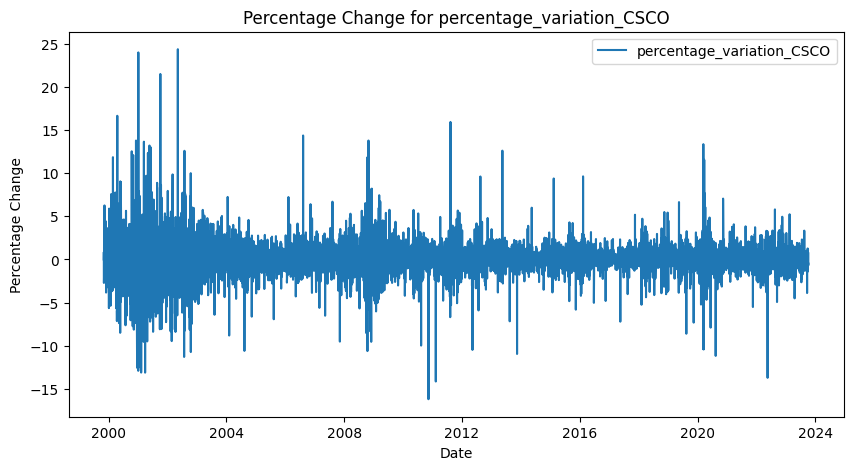

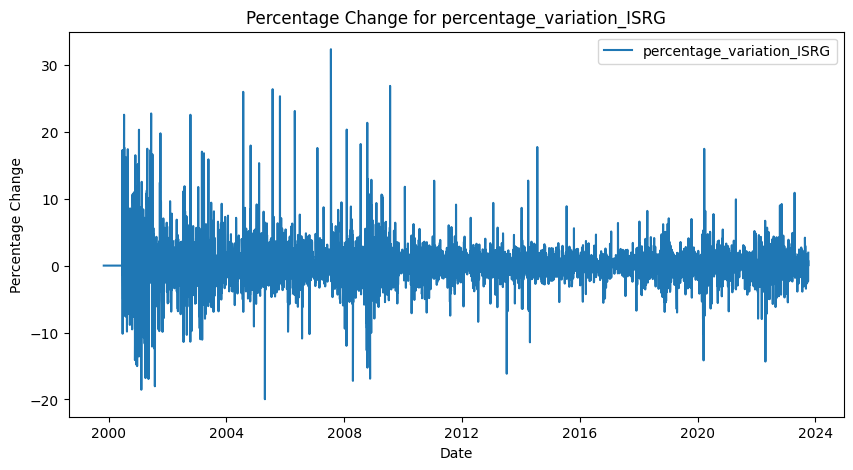

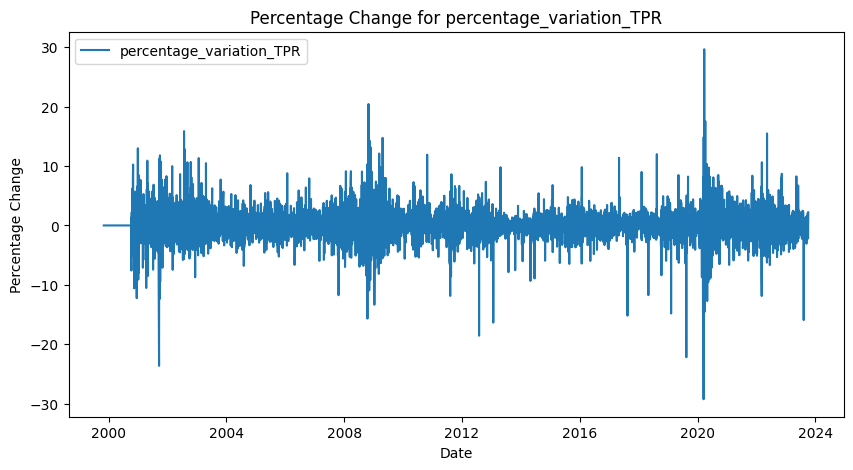

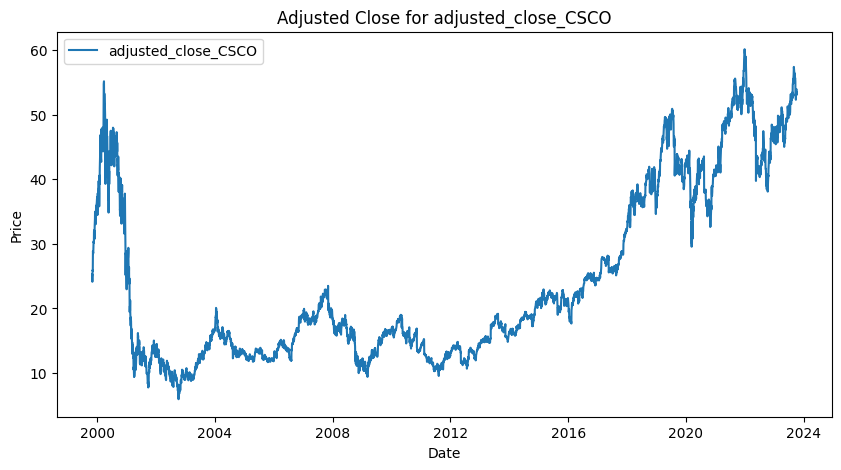

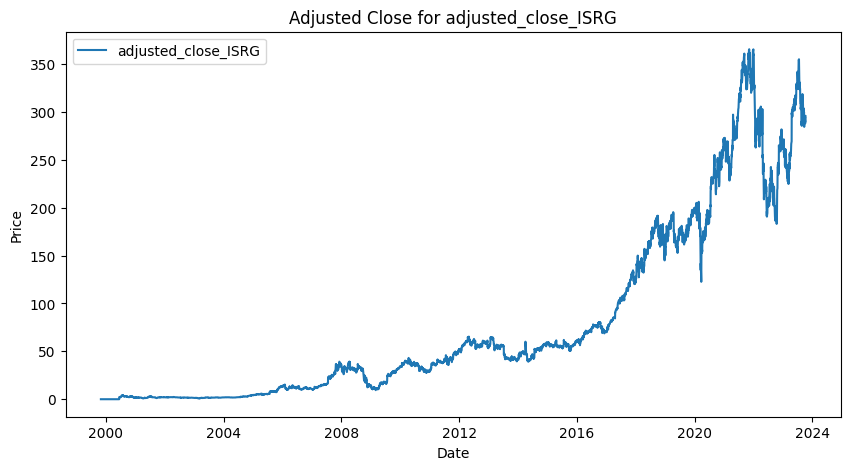

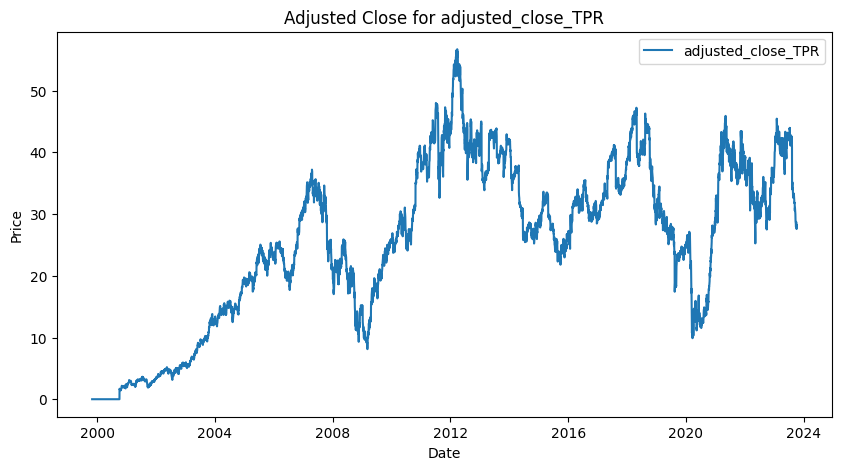

In [78]:
# Calculate percentage change
percentage_returns_df = adjusted_close_df.pct_change() * 100
# Replace inf values with 0 in the resulting DataFrame
percentage_returns_df.replace([np.inf, -np.inf], 0, inplace=True)

# Rename columns by replacing 'adjusted_close' with 'percentage_variation'
percentage_returns_df.columns = percentage_returns_df.columns.str.replace('adjusted_close', 'percentage_variation')

# Fill missing values in percentage_returns_df using linear interpolation
percentage_returns_df = percentage_returns_df.fillna(0)

# Print the first 3 columns of percentage_returns_df
print(percentage_returns_df.iloc[:, :3].head())

# Print the first 3 columns of adjusted_close_df
print(adjusted_close_df.iloc[:, :3].head())

# Create separate plots for the first 3 columns of percentage_returns_df
for col in percentage_returns_df.columns[:3]:
    plt.figure(figsize=(10, 5))
    plt.plot(percentage_returns_df.index, percentage_returns_df[col], label=col)
    plt.title(f'Percentage Change for {col}')
    plt.xlabel('Date')
    plt.ylabel('Percentage Change')
    plt.legend()
    plt.show()

# Create separate plots for the first 3 columns of adjusted_close_df
for col in adjusted_close_df.columns[:3]:
    plt.figure(figsize=(10, 5))
    plt.plot(adjusted_close_df.index, adjusted_close_df[col], label=col)
    plt.title(f'Adjusted Close for {col}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


            Unnamed: 0  adjusted_close
timestamp                             
2023-10-20           0          421.19
2023-10-19           1          426.43
2023-10-18           2          430.21
2023-10-17           3          436.02
2023-10-16           4          436.04


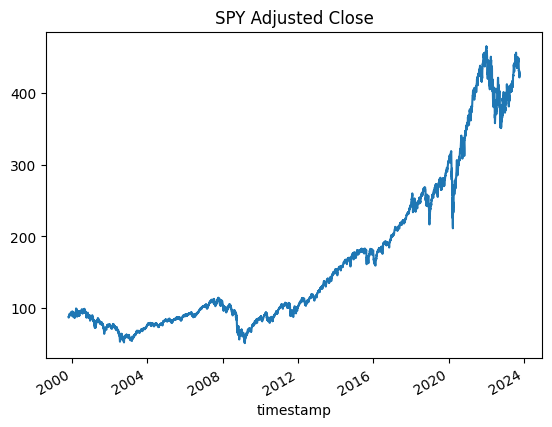

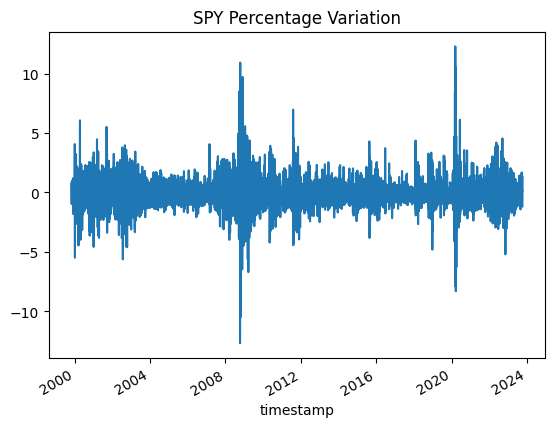

In [79]:
# data for SPY500 stock
spy_df = pd.read_csv(ROOT + '/series/benchmark/SPY.csv')
spy_df['timestamp'] = pd.to_datetime(spy_df['timestamp'])  # Convert 'timestamp' to datetime
spy_df.set_index('timestamp', inplace=True)

# The column names should be in quotes to be recognized as strings
spy_df.drop(['open', 'high', 'low', 'close','volume','dividend','split'], axis=1, inplace=True)
print(spy_df.head())
# Assuming percentage_returns_df is another DataFrame indexed by dates
# Find common dates in spy_df and percentage_returns_df
common_dates = spy_df.index.intersection(percentage_returns_df.index)

# Keep only the rows with common dates
spy_df = spy_df.loc[common_dates]

# Calculate the percentage change for the adjusted_close in spy_df
spy_df['percentage_variation'] = spy_df['adjusted_close'].pct_change() * 100

# Fill missing values in 'percentage_variation' column using linear interpolation
spy_df['percentage_variation'].interpolate(method='linear', inplace=True)

# Plot the adjusted close
spy_df['adjusted_close'].plot(title='SPY Adjusted Close')
plt.show()

# Plot the percentage variation
spy_df['percentage_variation'].plot(title='SPY Percentage Variation')
plt.show()

In [80]:
percentage_returns_df['percentage_variation_SPY500'] = spy_df['percentage_variation']
adjusted_close_df['adjusted_close_SPY500'] = spy_df['adjusted_close']

print(percentage_returns_df.head())
print(adjusted_close_df.head())

            percentage_variation_CSCO  percentage_variation_ISRG  \
timestamp                                                          
1999-11-01                   0.000000                        0.0   
1999-11-02                   0.850714                        0.0   
1999-11-03                  -2.721088                        0.0   
1999-11-04                  -2.097902                        0.0   
1999-11-05                   4.914286                        0.0   

            percentage_variation_TPR  percentage_variation_DVN  \
timestamp                                                        
1999-11-01                       0.0                  0.000000   
1999-11-02                       0.0                  0.000000   
1999-11-03                       0.0                 -0.488683   
1999-11-04                       0.0                  0.646162   
1999-11-05                       0.0                 -1.926040   

            percentage_variation_MRO  percentage_variation_B

In [81]:
def corr_heatmap(df):
    # Reset the index to remove it from the correlation calculation
    df_reset_index = df.reset_index(drop=True)
    
    graph_size = (12, 12)
    fig, ax = plt.subplots(figsize=graph_size)
    sn.heatmap(df_reset_index.corr(), ax=ax, vmin=-1, vmax=1, cmap='coolwarm')
    plt.show()


## Breaking the data per into per industry

In [82]:
# # code to separate stocks per industry
# # Load and sort the SP500 symbol information
# spy_symbols_info_df = pd.read_csv(ROOT + '/series/additional_data/SP500_symbol_info.csv')
# spy_symbols_info_df = spy_symbols_info_df.sort_values('Symbol')

# print(temp_df.head())

# # Extract unique industries
# industries = set(spy_symbols_info_df['GICS Sector'])

# # Process each industry
# for industry in industries:
#     # Find the symbols in this industry
#     industry_symbols = spy_symbols_info_df[spy_symbols_info_df['GICS Sector'] == industry]['Symbol']

#     # Columns to keep (intersection of symbols in industry and columns in temp_df)
#     columns_to_keep = [f'adjusted_close_{symbol}' for symbol in industry_symbols if f'adjusted_close_{symbol}' in adjusted_close_df.columns]
#     columns_to_keep.append( 'adjusted_close_SPY500')

#     # Create a dataframe for this industry using loc to keep the index
#     industry_df = adjusted_close_df.loc[:, columns_to_keep]

#     # Save this dataframe to CSV
#     industry_df.to_csv(f'{ROOT}/series/adjusted_close_per_industry/{industry}_adjusted_close.csv', index=True)


In [83]:
# # Create an empty dictionary to store DataFrames
# dfs_per_industry = {}

# #  Iterate through CSV files in the specified directory
# for filename in os.listdir(f'{ROOT}/series/adjusted_close_per_industry'):
#     if filename.endswith('.csv'):
#         file_path = os.path.join(f'{ROOT}/series/adjusted_close_per_industry', filename)
        
#         # Read the CSV file into a DataFrame and save it with the filename as the variable name
#         df_name = os.path.splitext(filename)[0] + '_df'
#         dfs_per_industry[df_name] = pd.read_csv(file_path)

# # # Now you have a dictionary 'dfs_per_industry' where each DataFrame is stored with its filename as the key

# # # Iterate through DataFrames in the 'dfs_per_industry' dictionary and create correlation heatmaps
# # for df_name, df in dfs_per_industry.items():
# #     df.drop('timestamp', axis=1, inplace=True)
# #     print(f"Correlation Heatmap for {df_name}:")
# #     corr_heatmap(df)

In [84]:
# # Assuming dfs_per_industry is a dictionary where keys are dataframe names and values are dataframes

# # Create an empty dictionary to store the results for each dataframe
# result_dict = {}

# for dfname, df in dfs_per_industry.items():
#     # Calculate the absolute correlations
#     corr_values = df.corr()['adjusted_close_SPY500']
    
#     # Create a copy of the original correlation values and sort it by absolute values
#     sorted_corr_values = corr_values.abs().sort_values(ascending=False)
    
#     # Store the result in the dictionary with the dataframe name as the key
#     result_dict[dfname] = (corr_values, sorted_corr_values)

# # Print the results
# for dfname, (original_corr_values, sorted_corr_values) in result_dict.items():
#     print(f"DataFrame: {dfname}")
#     print("Top columns with highest absolute correlation and their values:")
#     for column, correlation_value in sorted_corr_values.items():
#         print(f"{column}: {original_corr_values[column]}")
#     print()


## looking at correlations in percentage variations


In [85]:
# Assuming percentage_returns_df is already defined

# Sort the DataFrame by index (date) before calculating cumulative sum
cumulative_percentage_returns_df = pd.DataFrame(percentage_returns_df.cumsum())
cumulative_percentage_returns_df.columns = cumulative_percentage_returns_df.columns.str.replace('percentage_variation','cumulative_percentage_returns')

# Percentage Variation Difference with SPY DataFrame, this should tell us how much they outperform spy on any day
percentage_variation_difference_with_SPY_df = percentage_returns_df.apply(
    lambda row: row - row['percentage_variation_SPY500'],
    axis=1
).fillna(0)

percentage_variation_difference_with_SPY_df.columns = percentage_variation_difference_with_SPY_df.columns.str.replace('percentage_variation','percentage variation difference with SPY')

# Cumulative Percentage Variation Difference with SPY DataFrame
cumulative_percentage_variation_difference_with_SPY_df = percentage_variation_difference_with_SPY_df.fillna(0).sort_index().cumsum()
cumulative_percentage_variation_difference_with_SPY_df.columns = cumulative_percentage_variation_difference_with_SPY_df.columns.str.replace('percentage_variation','cumulative percentage variation difference with SPY')

# cumulative_percentage_returns_df.to_csv('temp.csv')
print("----------------------------------")
# print(percentage_variation_difference_with_SPY_df.head())
print(cumulative_percentage_variation_difference_with_SPY_df.tail(1))

----------------------------------
            percentage variation difference with SPY_CSCO  \
timestamp                                                   
2023-10-06                                     352.410739   

            percentage variation difference with SPY_ISRG  \
timestamp                                                   
2023-10-06                                     889.177578   

            percentage variation difference with SPY_TPR  \
timestamp                                                  
2023-10-06                                    613.141854   

            percentage variation difference with SPY_DVN  \
timestamp                                                  
2023-10-06                                    469.366817   

            percentage variation difference with SPY_MRO  \
timestamp                                                  
2023-10-06                                    504.547271   

            percentage variation difference with SPY_B

KeyError: 'cumulative_percentage_returnsSPY500'

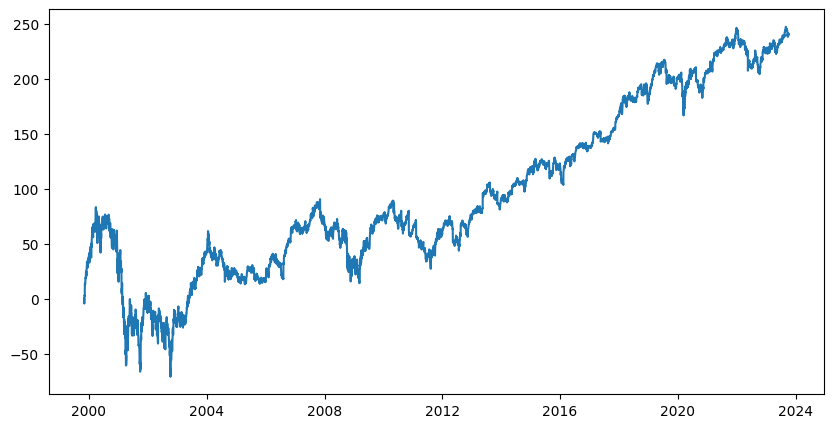

In [86]:
# Create separate plots for the first 3 columns of percentage_returns_df
for col in cumulative_percentage_returns_df.columns[:3]:
    plt.figure(figsize=(10, 5))
    plt.plot(cumulative_percentage_returns_df.index, cumulative_percentage_returns_df[col], label=col)
    plt.plot(cumulative_percentage_returns_df.index, cumulative_percentage_returns_df['cumulative_percentage_returnsSPY500'])
    plt.plot(cumulative_percentage_variation_difference_with_SPY_df.index, cumulative_percentage_variation_difference_with_SPY_df[col], label=col)
    plt.xlabel('Date')
    plt.ylabel('Percentage Change')
    plt.title(f'Cumulative difference with SPY500 for {col}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()